In [2]:
import pandas as pd
from collections import Counter

In [14]:
df_users = pd.read_csv('users.csv')

df_tweets = pd.read_csv('tweets.csv')

print(df_tweets.shape)
print(df_users.shape)
print(df_users.id.unique().shape)

(203482, 16)
(393, 14)
(393,)


**The table of users with unique ids: there are only 394 unique ids in the users table, but there are 454 rows. **

Before removing the users with only screen name column as part of data 
- ' print(df_tweets.shape)'
- ' print(df_users.shape)'
- ' print(df_users.id.unique().shape)'
- (203482, 16)
- (454, 14)
- (394,)

In [18]:
pd.merge(df_tweets, df_users, how='inner', left_on='user_id', right_on='id').shape
#inner because we want records common to both tables

(191766, 30)

df_joined.shape (before cleanup)
- (687382, 30)

see how it is 680k? in reality we only have 203k rows in tweets. All we are trying to do is take all the tweets and make sure we have columns that dsecribe the user as well as the tweet.
In the Excel book he got rid of those rows and reloaded everything, but how could we do that just in pandas? or is it easier in Excel because then the df doesn't take up the whole screen? 

In [19]:
#left join so even if we don't have user id in users we still have the row in tweets
df_joined = pd.merge(df_tweets, df_users, how='left', left_on='user_id', right_on='id')

In [20]:
df_joined.head()

,user_id,user_key,created_at_x,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,...,statuses_count,time_zone,verified,lang,screen_name,description,created_at_y,favourites_count,friends_count,listed_count
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,...,1853.0,Pacific Time (US & Canada),False,en,RyanMaxwell_1,"Conservative. sports fan. Doing what I love, p...",Sun Sep 15 19:45:16 +0000 2013,1102.0,1990.0,25.0
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",...,18924.0,Central Time (US & Canada),False,en,DetroitDailyNew,"Local news, sports, business, politics, entert...",Fri May 30 07:24:00 +0000 2014,4.0,5144.0,193.0
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,...,2188.0,Pacific Time (US & Canada),False,en,CooknCooks,"HI FBI !!! #TRUMP, #Trump2016, @realdonaldtrum...",Thu Aug 29 19:45:40 +0000 2013,2447.0,1454.0,15.0
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,...,2233.0,Eastern Time (US & Canada),False,en,queenofthewo,"I have not failed. I've just found 10,000 ways...",Thu Jun 05 12:27:57 +0000 2014,1275.0,1427.0,11.0
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,...,1978.0,Eastern Time (US & Canada),False,en,mrclydepratt,Life is a beautiful struggle. Seek enlightenme...,Sat Sep 07 19:16:06 +0000 2013,1996.0,847.0,23.0


#### Checking of most of the columns have data in them

In [22]:
#
df_joined.count()
#user_id, user_key - not a lot of data for in_reply_to... 
#so we have a decent amouunt of data. most cols have data filled out

user_id                  195417
user_key                 203482
created_at_x             203461
created_str              203461
retweet_count             58083
retweeted                 58083
favorite_count            58083
text                     203461
tweet_id                 201168
source                    58084
hashtags                 203482
expanded_urls            203482
posted                   203482
mentions                 203482
retweeted_status_id       39651
in_reply_to_status_id       559
id                       191766
location                 164861
name                     182095
followers_count          182095
statuses_count           182095
time_zone                181994
verified                 182095
lang                     182095
screen_name              191766
description              173175
created_at_y             182095
favourites_count         182095
friends_count            182095
listed_count             182095
dtype: int64

In [23]:
#screen name was actually in both tables. but you have to lower case it
# users['user_key'] = users['screen_name'].map(lambda x: x.lower())
# tweets['user_key'] = tweets['user_key'].map(lambda x: x.lower())

# joined = pd.merge(tweets, users, how='left', on='user_key')

# print(joined.shape)
# joined.drop_duplicates(inplace=True)
# print(joined.shape)

## Russian User Tweets (Req)
- load in both dataframes, create a new dataframe, joining the tweets data, to the users data
- Are all users in the tweets table, in the users table?
(Part 2)
- What user city (from the user's table) has the most tweets?
- filter all tweets, based on the top 5 users, with the most tweets
- From all tweets from the top 5 users, what are the most commonly used terms? (hint, use the Counter class from collections)
- show a histogram with the distribution of tweet length for these top 5 users

In [25]:
df_joined.shape

(203482, 30)

if we did an inner join, we would get fewer rows bc there are some users in tweets that aren't in users
he wants to make sure he has everything in tweets whethere or  not he has user data for it
- look at pandas merge docs

In [27]:
df_joined.location.unique().shape
#how many unique locations we have

(102,)

### TOP CITIES

In [29]:
df_joined.location.value_counts()[:5]
#does a quick count of how many rows there are in df for each value

USA               90804
United States     17521
Atlanta            9114
Pittsburgh, US     6652
US                 6448
Name: location, dtype: int64

In [30]:
df_joined.user_key.value_counts()[:5]

ameliebaldwin     9269
hyddrox           6813
giselleevns       6652
patriotblake      4140
thefoundingson    3663
Name: user_key, dtype: int64

#### CHECK

In [36]:
#make sure this corresponds with user_id
#df_joined.user_id.value_counts() - wouldn't slice for some reason
# 1.679279e+09    9269   - same number as ameliebaldwin
# 1.671235e+09    6813
# 2.882014e+09    6652
# 2.671070e+09    4140
# 4.508631e+09    3663

### FILTER BY TOP 5

In [37]:
#how to filter by top five users. how to get this into a data structure. 
#a Series. series methods - looking at docs for attributes and methods

In [39]:
#get these names into a list so you can filter on them
top_5 = list(df_joined.user_key.value_counts()[:5].to_dict().keys())

In [40]:
top_5

['ameliebaldwin', 'hyddrox', 'giselleevns', 'patriotblake', 'thefoundingson']

#### Check

In [45]:
df_joined.user_key.isin(top_5)[:10]
#returs a boolean mask which basically says whether they are in the list.
#you can look at head and confirm that - see that 5 is gisellevans
#df_joined.head(6)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8     True
9    False
Name: user_key, dtype: bool

#### Mask using isin()

In [48]:
mask = df_joined.user_key.isin(top_5)
new_df = df_joined[mask]
# !!!
new_df.shape
#these 5 users have 305k tweets

(30537, 30)

#### Get top used terms in Tweets Column - 'text'

In [52]:
new_df.text.head()

5                                @ModicaGiunta me, too!
8     RT @AriaWilsonGOP: 3 Women Face Charges After ...
11    RT @America_1st_: CW: "The thing that impresse...
15    #My2017BiggestHope to reach this level of pett...
19    RT @K1erry: The Marco Rubio knockdown of Eliza...
Name: text, dtype: object

##### take values from text column and put them in giant string

In [53]:
tweet_list = new_df.text.tolist()

In [54]:
tweet_list[:3]

['@ModicaGiunta me, too!',
 'RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH',
 'RT @America_1st_: CW: "The thing that impressed me was that Trump is always comfortable in own skin, but now he was comfortable being the P…']

In [55]:
tweet_str = ' '.join(tweet_list)

In [57]:
tweet_str[:300]

'@ModicaGiunta me, too! RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH RT @America_1st_: CW: "The thing that impressed me was that Trump is always comfortable in own skin, but now he was comfortable being the P'

In [64]:
big_tweet_str = tweet_str.split()

In [70]:
c = Counter(big_tweet_str)

def print_counter_len_threshold(the_counter, min_len, items_count):
    for term, freq in the_counter.most_common(items_count):
        if len(term) > min_len:
            print(term, freq)

print_counter_len_threshold(c, 6, 10000)
# for term, freq in Counter(big_tweet_str).most_common(1000):
#     if len(term) > 4:
#         print(term, freq)

Hillary 1856
Clinton 1737
@realDonaldTrump 879
@HillaryClinton 519
#MakeMeHateYouInOnePhrase 387
America 378
https://… 377
https:… 374
President 368
https:/… 342
Trump's 336
American 328
https://t… 314
because 303
against 291
#SometimesItsOkTo 288
#ThingsNotTaughtAtSchool 284
#RuinADinnerInOnePhrase 283
https://t.… 279
#Trump2016 275
#IdRunForPresidentIf 272
https://t.c… 272
#2017SurvivalTips 267
#RealLifeMagicSpells 266
#NeverHillary 264
campaign 252
doesn't 247
https://t.co/… 231
#My2017Resolution 228
https://t.co… 226
#ImTooOldFor 224
#ChristmasAftermath 218
@ChrixMorgan: 218
Obama's 217
Clinton's 212
Hillary's 210
#AlternativeAcronymInterpretations 209
#My2017BiggestHope 206
Americans 202
country 201
support 200
election 199
#MakeAmericaGreatAgain 194
@realDonaldTrump: 189
Democrats 180
#TrumpPence16 179
@cmdorsey: 178
#IHaveARightToKnow 175
#IHaveADreamThat 174
#WakeUpAmerica 173
#BetterAlternativeToDebates 169
believe 166
#TrumpTrain 165
@DanaGeezus: 162
Foundation 160
#ICelebrat

neither 15
ELECTION 15
Mainstream 15
speech. 15
journalists 15
@JamesOKeefeIII: 15
election? 15
they've 15
@Jbxpress: 15
Goldman 15
@SilERabbit: 15
@slone: 15
@carrieksada: 15
#teaparty 15
country, 15
@SpecialKMB1969: 15
@ORConservative: 15
society 15
#Christmasaftermath 15
dishonest 15
@MissLizzyNJ: 15
@TrumpSuperPAC: 14
Chinese 14
Started 14
@washingtonpost 14
@mrd125: 14
@BigEnuff: 14
@MichaelTCoffee: 14
dangerous 14
"Clinton 14
@FemalesForTrump: 14
outrage 14
@Boazziz: 14
realized 14
pressure 14
EXCLUSIVE: 14
opposed 14
behavior 14
@larryelder: 14
@NrouteHQ: 14
confused 14
Russia, 14
Americans, 14
Protect 14
@DeVon_FNMfan2K8: 14
#draintheswamp 14
learned 14
@NBCNews 14
warning 14
#ThingsNotToDoLastMinute 14
yesterday 14
@benshapiro: 14
praying 14
seriously 14
@AG_Conservative: 14
#Hillary's 14
@KamVTV: 14
#VoterFraud 14
whining 14
Democrats. 14
welfare 14
defending 14
@UnPoliticalPrty: 14
destruction 14
Kellyanne 14
investigating 14
history. 14
Candidate 14
#IWillAlwaysLove 14
chan

#Download 10
Destroys 10
Charges 9
considering 9
advantage 9
Comment 9
people? 9
similar 9
stupid. 9
Suicide 9
#Birther 9
Between 9
joining 9
successful 9
@FreakyP88 9
@returnofthejed 9
criminals 9
happened. 9
@osPatriot 9
Jerusalem 9
#realbencarson 9
@aliakberhabib: 9
@DcStarlord: 9
Tonight 9
nominee 9
@guypbenson: 9
@michaelallenmar: 9
#BillClinton 9
Islamists 9
opinions 9
existence 9
#InquisitiveMovies 9
@jb_morey: 9
hundreds 9
scientists 9
pipeline 9
Putin's 9
criticism 9
Wouldn't 9
Waiting 9
approve 9
themselves. 9
@schofey27: 9
anymore! 9
Killery 9
Where's 9
Saturday 9
anyway. 9
headlines 9
Catholic 9
#RETWEET 9
@billclinton 9
@IvankaTrump: 9
@ReaganBattalion: 9
#TRUMP2016 9
Officials 9
@DCExaminer 9
Probably 9
@JennaBelle: 9
#climatechange 9
morning, 9
@frankgaffney: 9
realDonaldTrump 9
promote 9
tolerance 9
@BuckInEars: 9
rigging 9
primaries 9
yourselves 9
strikes 9
moderator 9
everything. 9
economic 9
#OscarsSoWhite 9
Charity 9
#crookedhillary 9
Catholics 9
receives 9
@MarkDic

nomination 7
Transgender 7
@StacyBrewer18: 7
criticizing 7
elderly 7
@Twitter 7
@Deir_in_DC: 7
falsely 7
uranium 7
smarter 7
hurting 7
revolution 7
relations 7
Hopefully 7
inciting 7
@SurfPHX: 7
Jumping 7
https://t.co/rY0AEi6… 7
campaign, 7
security. 7
@laughingskull59: 7
@Starbucks 7
appoint 7
@WriteAwayEurope: 7
Williams 7
They’re 7
Replace 7
#IfICouldntLie 7
investigated 7
signing 7
@sadiehawke1108: 7
debate, 7
Debate, 7
secretly 7
#lnyhbt 7
confidence 7
Problem 7
PROTECT 7
providing 7
#TrumpTapes 7
@rafshmatko: 7
credibility 7
Machado 7
Thursday 7
shocked 7
Campaigning 7
diversity 7
@ConstanceQueen8 7
#TrumpProtest 7
medicine 7
traitors 7
@irritatedwoman: 7
Beyonce 7
@TrumpDynastyUSA: 7
#LiberalTears 7
fingers 7
@PoliticalShort: 7
disgrace. 7
Matthew 7
@DrLee4America: 7
@democracynow: 7
@HouseGOP 7
OBAMA'S 7
veterans, 7
@GenFlynn: 7
https://t.co/r… 7
standard 7
doubled 7
advance 7
uneducated 7
"President 7
#SupremeCourt 7
opposition 7
@propapergirl: 7
disastrous 7
children, 7
CAMPA

@TimRunsHisMouth: 6
@EricSpracklen: 6
@JonahNRO: 6
Marching 6
together! 6
cover-up 6
partner 6
letters 6
slammed 6
platform 6
condemnation 6
beloved 6
@ShepNewsTeam 6
@TPoliticmanager: 6
@BarracudaMama 6
America: 6
station 6
@iAmFreedomMan: 6
@dmartosko: 6
islamic 6
Barbara 6
Millennial 6
#pizzagate 6
@oreillyfactor 6
#Christians 6
#boycottNFL 6
@Ziplok_: 6
Democrats, 6
@KatiePavlich: 6
delivers 6
choice! 6
@HomerWhite: 6
nutshell 6
Florida, 6
cheaper 6
@visionnairasoc: 6
Disgusting 6
@MichaelDelauzon: 6
outlets 6
@kittykaresless: 6
society. 6
@RedMennace 6
@Vote4JillStein1: 6
tweets. 6
assured 6
spineless 6
#MichelleObama 6
#IStartCryingWhen 6
@AllenWestRepub 6
@Reuters 6
realizing 6
teaching 6
terrified 6
Russia's 6
@DizzyPizzy2: 6
disgrace! 6
Congress. 6
sarcasm 6
contact 6
watches 6
civilians 6
things, 6
intentionally 6
Records 6
targets 6
@Noel_T10: 6
appearance 6
labeled 6
Investigating 6
Erdogan 6
mistakes 6
#SextingWentWrongWhen 6
Russia? 6
neighborhood 6
@washingtonpost: 6
fea

Canadians 4
contradicts 4
Pelosi's 4
emotions 4
#ClintonCollapse 4
fraudulent 4
#StandUpWithEvan 4
#NothingToDoWithIslam 4
Straight 4
Intentionally 4
Subpoena 4
opponent 4
overthrow 4
lottery 4
fainting 4
trading 4
Sanders' 4
"#RuinADinnerInOnePhrase 4
Promoting 4
downplay 4
Declared 4
elected, 4
focusing 4
pipelines 4
fracking 4
@BIZPACReview: 4
BuzzFeed 4
Demographics 4
@LulusParty: 4
Congress: 4
negotiating 4
underwear 4
diagnosed 4
pneumonia. 4
@KyleWRowley 4
Growing 4
judgment 4
@ejoy2270: 4
Bigoted 4
Deplorable, 4
Discrimination 4
unsolicited 4
@BigAlDell: 4
background 4
DISGUSTING 4
problems. 4
control. 4
@the_unhinged: 4
Listen, 4
proposing 4
theories 4
Laughing 4
understand. 4
credentials 4
abortion. 4
@JustKate038 4
@RitzyBacon2 4
@TeaPartyOrg: 4
approves 4
Flopping 4
forgiveness 4
DemORATS 4
marching 4
#corruption 4
@BookmanDan: 4
Humiliation 4
@CharlieDaniels: 4
TEACHER 4
CHILDREN'S 4
http://t.co/FsRnjx5… 4
Hashtags 4
@SykesCharlie: 4
Muslims, 4
@kimmie99 4
@adamjohnsonNYC:

### making histogram of tweet lengths

In [73]:
[len(x) for x in new_df.text.tolist()][:10]

[22, 137, 140, 75, 116, 84, 52, 71, 144, 57]

In [76]:
new_df['tweet_len'] = new_df['text'].map(lambda x: len(x))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
new_df.head()

,user_id,user_key,created_at_x,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,...,time_zone,verified,lang,screen_name,description,created_at_y,favourites_count,friends_count,listed_count,tweet_len
5,2.882014e+09,giselleevns,1.477496e+12,2016-10-26 15:33:58,NaN,NaN,NaN,"@ModicaGiunta me, too!",7.913019e+17,NaN,...,Eastern Time (US & Canada),False,en,GiselleEvns,"if you don't work hard to achieve your dreams,...",Wed Oct 29 11:47:31 +0000 2014,9122.0,21953.0,113.0,22
8,1.679279e+09,ameliebaldwin,1.477792e+12,2016-10-30 01:48:19,0.0,False,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After ...,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,Eastern Time (US & Canada),False,en,AmelieBaldwin,"Wife, Mother, Patriot, Friend",Sat Aug 17 22:53:07 +0000 2013,14540.0,1930.0,160.0,137
11,2.671070e+09,patriotblake,1.481543e+12,2016-12-12 11:43:11,NaN,NaN,NaN,"RT @America_1st_: CW: ""The thing that impresse...",8.082760e+17,NaN,...,Eastern Time (US & Canada),False,en,PatriotBlake,"Big Government=corruption, #NRA, Conservative,...",Fri Jul 04 08:01:06 +0000 2014,3533.0,2286.0,38.0,140
15,2.882014e+09,giselleevns,1.483544e+12,2017-01-04 15:32:27,NaN,NaN,NaN,#My2017BiggestHope to reach this level of pett...,8.166686e+17,NaN,...,Eastern Time (US & Canada),False,en,GiselleEvns,"if you don't work hard to achieve your dreams,...",Wed Oct 29 11:47:31 +0000 2014,9122.0,21953.0,113.0,75
19,1.671235e+09,hyddrox,1.486636e+12,2017-02-09 10:26:17,NaN,NaN,NaN,RT @K1erry: The Marco Rubio knockdown of Eliza...,8.296375e+17,NaN,...,Eastern Time (US & Canada),False,en,hyddrox,~Reagan Conservative ~Jesus Lover ~PRO-Israel ...,Wed Aug 14 19:07:30 +0000 2013,8748.0,2159.0,72.0,116


In [79]:
%matplotlib inline 
#any plots you use will be shown

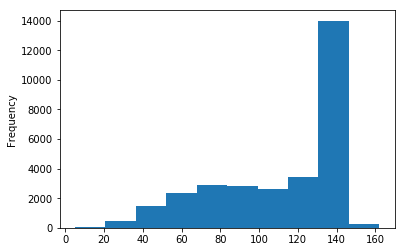

In [80]:
new_df.tweet_len.plot.hist()

In [83]:
new_df.tweet_len.value_counts().head(10)

140    8167
144    1066
139     879
141     433
142     398
138     361
137     353
131     337
136     325
133     321
Name: tweet_len, dtype: int64